##### Beckett Jaeger Prelim Work on Weather Classification

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('weather_classification_data.csv')

df.shape

(13200, 11)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


#### 13200 Entries in dataset

In [25]:
# Display the first 5 rows of the dataset
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [26]:
# Check if target variable is balanced and what the possible values are.
print(df['Weather Type'].value_counts())

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


#### Classification problem on Weather Type.  Weather Type is balanced with 4 catagories Rainy, Cloudy, Sunny, and Snowy. All with 3300 entries.

In [27]:
# Check for missing values in the dataset
print(df.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


#### Data set is already balanced and cleaned of any null values, I believe this dataset may already have been cleaned

In [28]:
print(df.describe())

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000000         3.000000  
50%

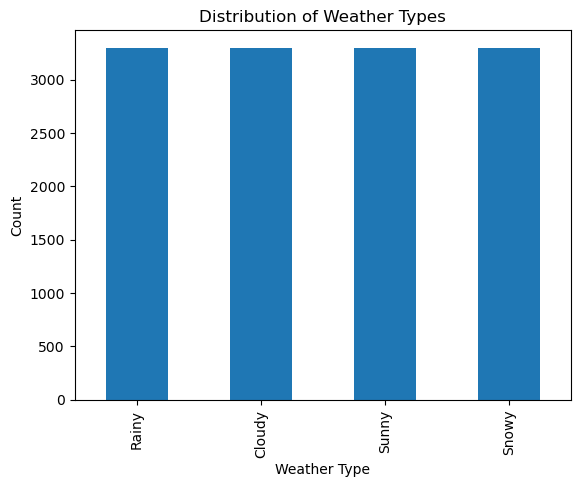

In [ ]:
df['Weather Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Weather Types')
plt.xlabel('Weather Type')
plt.ylabel('Count')
plt.show()

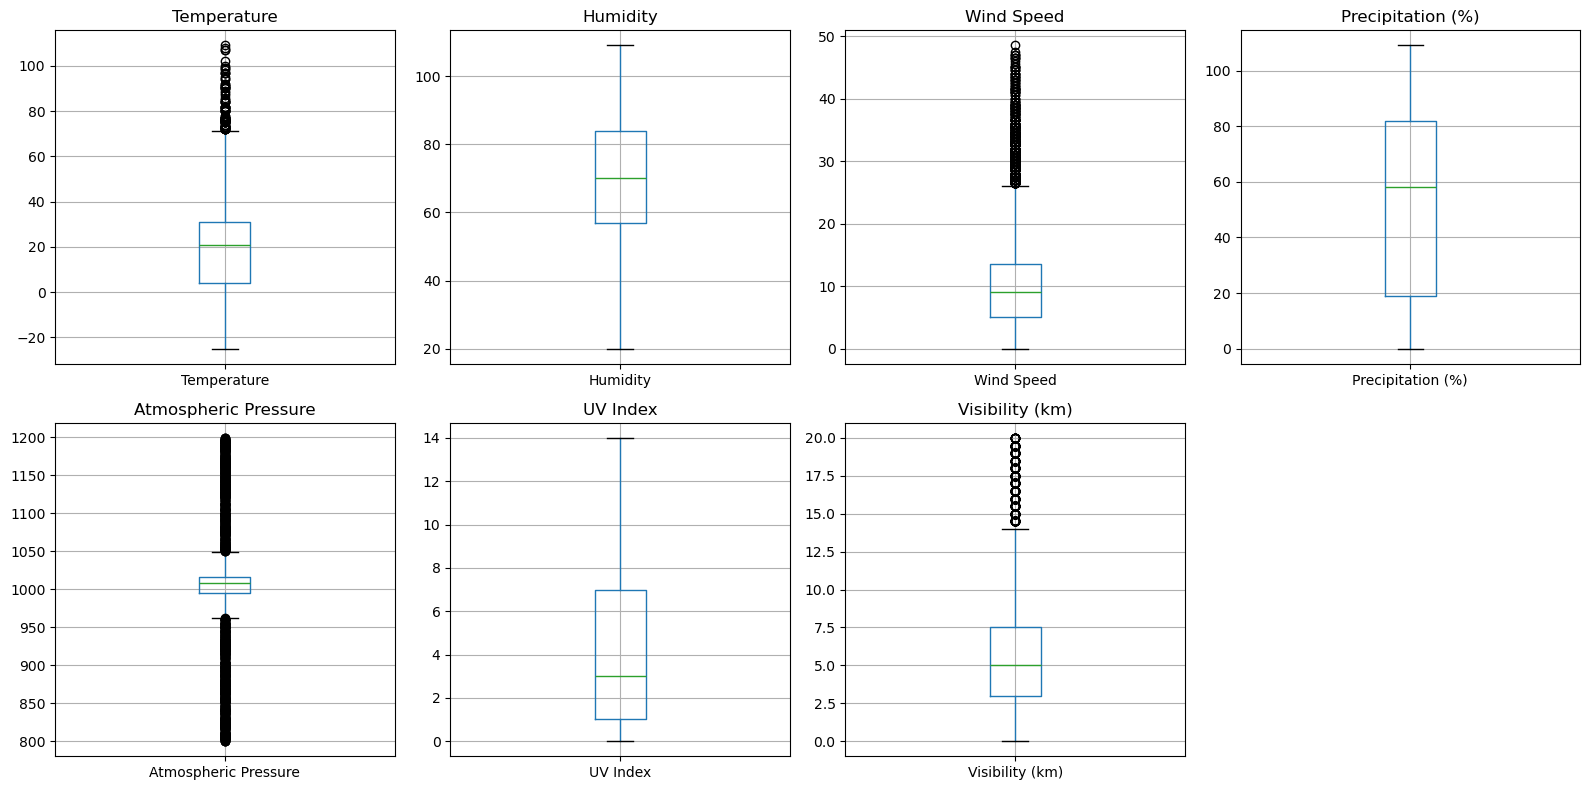

In [ ]:
#Boxplots of all numeric features in the dataset
# List of columns to plot
columns_to_plot = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 
                   'Atmospheric Pressure', 'UV Index', 'Visibility (km)']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))  # Adjust rows/cols as needed
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        df.boxplot(column=[column], ax=axes[i])
        axes[i].set_title(column)

# Hide any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [42]:
# Calculate the mode (most frequent class) of the target variable
mode_class = df['Weather Type'].mode()[0]

# Predict the mode for all entries
baseline_predictions = [mode_class] * len(df)

# Calculate the baseline accuracy
from sklearn.metrics import accuracy_score

baseline_accuracy = accuracy_score(df['Weather Type'], baseline_predictions)
baseline_error_rate = 1 - baseline_accuracy

print(f"Baseline Accuracy: {baseline_accuracy:.2f}")
print(f"Baseline Error Rate: {baseline_error_rate:.2f}")

Baseline Accuracy: 0.25
Baseline Error Rate: 0.75


In [44]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}:\n{df[col].value_counts()}\n")

Cloud Cover:
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Season:
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Location:
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

Weather Type:
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

